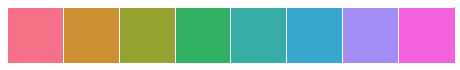

In [1]:
from donut import *
from math import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import os

%matplotlib inline

import pandas as pd
import seaborn as sns

palette = sns.color_palette()

#sns.palplot(sns.color_palette("husl", 8))
cm = sns.light_palette("magenta",as_cmap=True)
sns.set(style='ticks',palette='husl')
cmm = sns.light_palette("#8e0152",as_cmap=True)
cmg = sns.light_palette("#276419",as_cmap=True)
cmdg = sns.light_palette("#006837",as_cmap=True)


w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_100000_combined_check.dat")

k = bearclaw.MakeStandardKeyboard()
k.RemoveKey('.')

kStan = k


In [7]:
datList = []

filename = "/Users/Rylan/cisc/creamTeam/donutData/finalOptData/GoogleGKC_wl20k_eff40k_altair_1.0000.dat"
if os.path.exists(filename):
    print(filename)
    dat = cruller.TrainingDataFileFormat()
    dat.LoadFromFile(filename)
    datList.append(dat)
    
finalfilename = "/Users/Rylan/cisc/creamTeam/donutData/finalOptData/GoogleGKC_wl20k_eff40k_altair_1_FINAL.dat"
if os.path.exists(finalfilename):
    print(finalfilename)
    dat = cruller.TrainingDataFileFormat()
    dat.LoadFromFile(finalfilename)
    datList.append(dat)

print(len(datList))

/Users/Rylan/cisc/creamTeam/donutData/finalOptData/GoogleGKC_wl20k_eff40k_altair_1.0000.dat
/Users/Rylan/cisc/creamTeam/donutData/finalOptData/GoogleGKC_wl20k_eff40k_altair_1_FINAL.dat
2


In [8]:
allFin, avFin, spFin, hermFin, monFin, cubFin, modFin = [],[],[],[],[],[],[]
avFinErr, spFinErr, hermFinErr, monFinErr, cubFinErr, modFinErr = [],[],[],[],[],[]

nFiles,i = 0,0
keyboards = []
effWorst,errWorst = 0,0
iWorst = 0

for dat in datList:
    meta, eff = dat.PythonData()
    nFiles += 1
    for keyboard, d in eff:
    
        keyboards.append(keyboard)
        spFin.append(1-d['spatial'].Fitness())
        allFin.append(1-d['spatial'].Fitness())
        spFinErr.append(d['spatial'].Error())
        
        cubFin.append(1-d['cubic'].Fitness())
        allFin.append(1-d['cubic'].Fitness())
        cubFinErr.append(d['cubic'].Error())
        
        modFin.append(1-d['modCubic'].Fitness())
        allFin.append(1-d['modCubic'].Fitness())
        modFinErr.append(d['modCubic'].Error())
        
        hermFin.append(1-d['hermite'].Fitness())
        allFin.append(1-d['hermite'].Fitness())
        hermFinErr.append(d['hermite'].Error())
        
        monFin.append(1-d['monotonic'].Fitness())
        allFin.append(1-d['monotonic'].Fitness())
        monFinErr.append(d['monotonic'].Error())
        
        avFin.append((spFin[-1]+hermFin[-1]+monFin[-1]+cubFin[-1]+modFin[-1])/5)
        avFinErr.append((spFinErr[-1]+cubFinErr[-1]+modFinErr[-1]+hermFinErr[-1]+monFinErr[-1])/sqrt(5)) 
        
        if avFin[-1] > effWorst:
            iWorst = i
            effWorst = avFin[-1]
        i+=1
    
print(len(keyboards))

2


eff = 0.08745899999997324 +/- 0.0022031148633


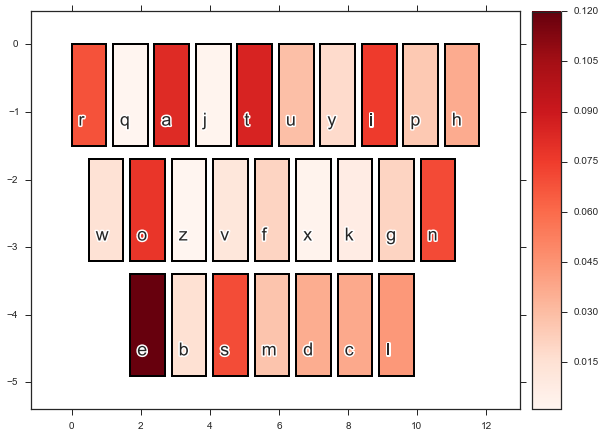

rqajtuyiphwozvfxkgnebsmdcl
eff = 0.09758220000005205 +/- 0.00312807971541


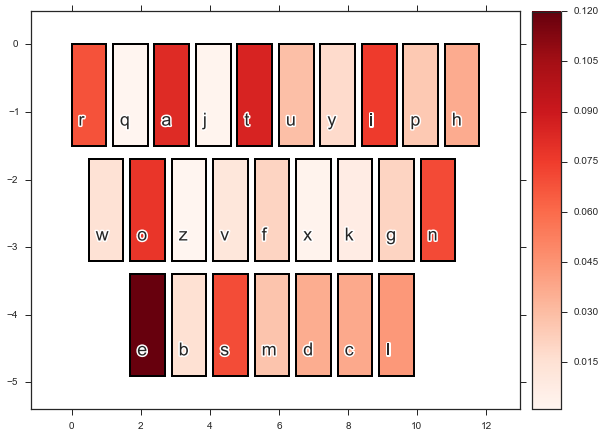

rqajtuyiphwozvfxkgnebsmdcl


In [11]:
for i in range(len(keyboards)):
    print("eff =",avFin[i],"+/-",avFinErr[i])
    bearclaw.DrawKeyboard(keyboards[i],wordlist=w,colormap=mpl.cm.Reds,figsize=(8,6))
    print(''.join(keyboards[0].OrderedKeyList()))

The best keyboard has an error rate of:  0.27346620000003746  +/- 0.00109442019582


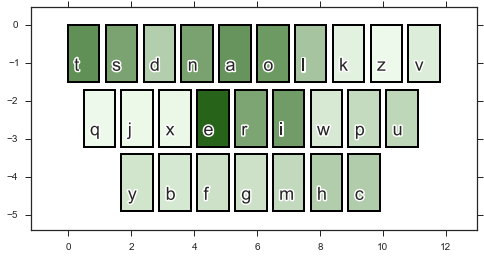

tsdnaolkzvqjxeriwpuybfgmhc


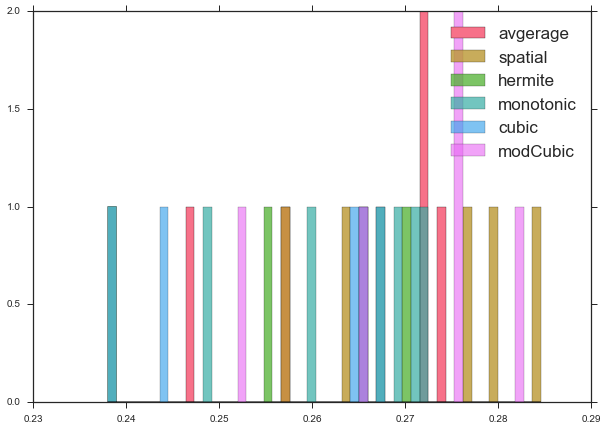

In [12]:
print("The best keyboard has an error rate of: ",avFin[iWorst]," +/-",avFinErr[iWorst])
#bearclaw.DrawKeyboard(keyboards[iWorst],wordlist=w,colormap=cmg,figsize=(8,4),nopalette=True,saveas="/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/finalBadKeyboard_g.pdf")
bearclaw.DrawKeyboard(keyboards[4],wordlist=w,colormap=cmg,figsize=(8,4),nopalette=True,saveas="/Users/Rylan/cisc/creamTeam/DonutDocs/plots/finalPlots/finalBadKeyboard_g.pdf")

keystr = ''.join(keyboards[4].OrderedKeyList())
print(keystr)

n1, b, p = plt.hist(allFin,50,label="avg",normed=False,alpha=1.0)
plt.close()

plt.figure(figsize=(10,7))
plt.hist(avFin,b,label="avgerage",normed=False,alpha=1.0)
plt.hist(spFin,b,label="spatial",normed=False,alpha=0.8)
plt.hist(hermFin,b,label="hermite",normed=False,alpha=0.75)
plt.hist(monFin,b,label="monotonic",normed=False,alpha=0.7)
plt.hist(cubFin,b,label="cubic",normed=False,alpha=0.65)
plt.hist(modFin,b,label="modCubic",normed=False,alpha=0.6)
plt.legend(loc="upper right",prop={'size':17})
plt.show()


10 files loaded.
500 data points loaded.


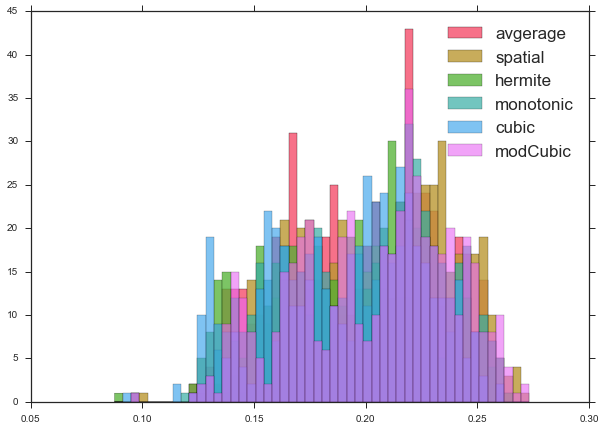

dMin = 0.25436600000000265


In [13]:
avEff, allEff, spEff, hermEff, monEff, cubEff, modEff = [],[],[],[],[],[],[]
avErr, allErr, spErr, hermErr, monErr, cubErr, modErr = [],[],[],[],[],[],[]

xvals, allavg, spavg, hermavg, monavg, cubavg, modavg = [],[],[],[],[],[],[]
nFiles,nData,imax,dminErr = 0,0,0,0
dMax = 0.0
kBest = kStan
keyboardsAll = [[] for x in range(nProc)]

j=0
for dlist in datList:
    i = 0
    for dat in dlist:
        meta, eff = dat.PythonData()
        nFiles += 1
        for keyboard, d in eff:
            keyboardsAll[j].append(keyboard)
            nData+=1
            spEff.append(1-d['spatial'].Fitness())
            allEff.append(spEff[-1])
            hermEff.append(1-d['hermite'].Fitness())
            allEff.append(hermEff[-1])
            monEff.append(1-d['monotonic'].Fitness())
            allEff.append(monEff[-1])
            cubEff.append(1-d['cubic'].Fitness())
            allEff.append(cubEff[-1])
            modEff.append(1-d['modCubic'].Fitness())
            allEff.append(modEff[-1])
            avEff.append((spEff[-1]+hermEff[-1]+monEff[-1]+cubEff[-1]+modEff[-1])/5)
            
            allavg.append((i,avEff[-1])) 
            spavg.append((i,spEff[-1]))
            hermavg.append((i,hermEff[-1]))
            monavg.append((i,monEff[-1]))
            cubavg.append((i,cubEff[-1]))
            modavg.append((i,modEff[-1]))
        
            spErr.append(d['spatial'].Error())
            hermErr.append(d['hermite'].Error())
            monErr.append(d['monotonic'].Error())
            cubErr.append(d['cubic'].Error())
            modErr.append(d['modCubic'].Error())
            avErr.append(spErr[-1]/sqrt(5))  
        
            if avEff[-1] > dMax:
                dMin = avEff[-1]
                dMinErr = avErr[-1]
                kBest = keyboard
            
            xvals.append(i)
            i+=1            
        
        if i > imax:
            imax = i
    j+=1
    
print(nFiles, "files loaded.")
print(nData, "data points loaded.")

n1, b, p = plt.hist(allEff,50,label="avg",normed=False,alpha=1.0)
plt.close()

plt.figure(figsize=(10,7))
plt.hist(avEff,b,label="avgerage",normed=False,alpha=1.0)
plt.hist(spEff,b,label="spatial",normed=False,alpha=0.8)
plt.hist(hermEff,b,label="hermite",normed=False,alpha=0.75)
plt.hist(monEff,b,label="monotonic",normed=False,alpha=0.7)
plt.hist(cubEff,b,label="cubic",normed=False,alpha=0.65)
plt.hist(modEff,b,label="modCubic",normed=False,alpha=0.6)
plt.legend(loc="upper right",prop={'size':17})
plt.show()

print("dMin =",dMin)
#savefig('optimizatinDistribution.pdf')

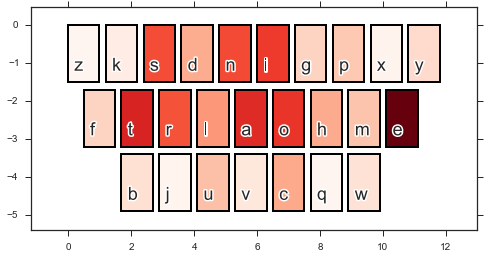

In [9]:
bearclaw.DrawKeyboard(keyboardsAll[0][-1],wordlist=w,colormap=mpl.cm.Reds,figsize=(8,4),nopalette=True)

In [10]:
allAvg,spAvg,hermAvg,monAvg,cubAvg,modAvg = [],[],[],[],[],[]
allAvgErr,spAvgErr,hermAvgErr,monAvgErr,cubAvgErr,modAvgErr = [],[],[],[],[],[]
for i in range(imax):
    allAvg.append(0)
    npts = 0
    for x in allavg:
        if x[0] == i:
            allAvg[i] += x[1]
            npts += 1
    allAvg[i] = allAvg[i]/npts
    allAvgErr.append(avErr[0]/sqrt(npts))
    
    spAvg.append(0)
    npts = 0
    for x in spavg:
        if x[0] == i:
            spAvg[i] += x[1]
            npts += 1
    spAvg[i] = spAvg[i]/npts
    spAvgErr.append(spErr[0]/sqrt(npts))
    
    hermAvg.append(0)
    npts = 0
    for x in hermavg:
        if x[0] == i:
            hermAvg[i] += x[1]
            npts += 1
    hermAvg[i] = hermAvg[i]/npts
    hermAvgErr.append(hermErr[0]/sqrt(npts))
            
    monAvg.append(0)      
    npts = 0
    for x in monavg:
        if x[0] == i:
            monAvg[i] += x[1]
            npts += 1
    monAvg[i] = monAvg[i]/npts
    monAvgErr.append(monErr[0]/sqrt(npts))
    
    cubAvg.append(0)
    npts = 0
    for x in cubavg:
        if x[0] == i:
            cubAvg[i] += x[1]
            npts += 1
    cubAvg[i] = cubAvg[i]/npts
    cubAvgErr.append(cubErr[0]/sqrt(npts))
    
    modAvg.append(0)
    npts = 0
    for x in modavg:
        if x[0] == i:
            modAvg[i] += x[1]
            npts += 1
    modAvg[i] = modAvg[i]/npts
    modAvgErr.append(modErr[0]/sqrt(npts))

100


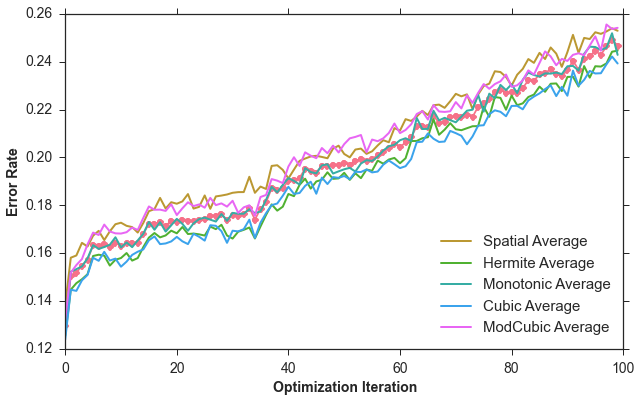

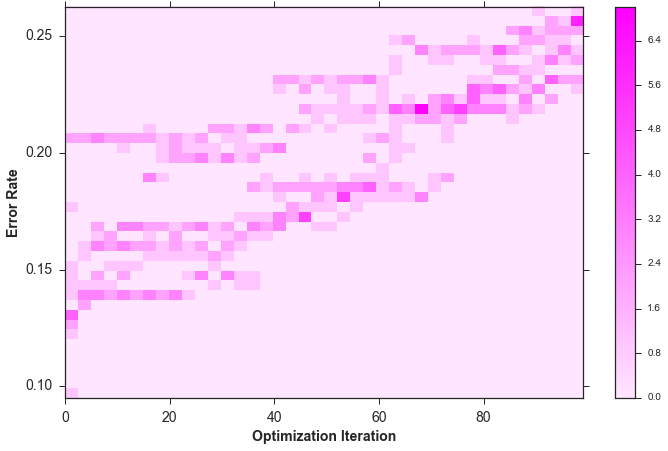

In [12]:
print(imax)
#plt.figure(figsize=(10,6))
#plt.errorbar(range(imax),allAvg,yerr=allAvgErr,fmt='-o')
#plt.ylabel('Error Rate',fontsize=14,fontweight='bold')
#plt.xlabel('Optimization Iteration',fontsize=14,fontweight='bold')
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.xlim((0,imax))
#show()


plt.figure(figsize=(10,6))
plt.errorbar(range(imax),allAvg,yerr=allAvgErr,fmt='-o')
#lineAvg = plt.plot(range(imax),allAvg,linestyle='-',linewidth=5,label='Total Average')
lineSp = plt.plot(range(imax),spAvg,linestyle='-',linewidth=2,label='Spatial Average')
lineHerm = plt.plot(range(imax),hermAvg,linestyle='-',linewidth=2,label='Hermite Average')
lineMon = plt.plot(range(imax),monAvg,linestyle='-',linewidth=2,label='Monotonic Average')
lineCub = plt.plot(range(imax),cubAvg,linestyle='-',linewidth=2,label='Cubic Average')
lineMod = plt.plot(range(imax),modAvg,linestyle='-',linewidth=2,label='ModCubic Average')
legend(loc='lower right',prop={'size':15})
plt.ylabel('Error Rate',fontsize=14,fontweight='bold')
#plt.ylim(0.20,0.24)
plt.xlabel('Optimization Iteration',fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#savefig('/Users/Rylan/cisc/creamTeam/DonutDocs/plots/avgOptimizationIterations_allInterps.pdf')
show()


plt.figure(figsize=(11.6,7))
hist2d(xvals, avEff,bins=40,cmap=cm)
plt.ylabel('Error Rate',fontsize=14,fontweight='bold')
plt.xlabel('Optimization Iteration',fontsize=14,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
colorbar()
#savefig('/Users/Rylan/cisc/creamTeam/DonutDocs/plots/allOptimizationIterations_allInterps.pdf')

#filename = '/Users/Rylan/Documents/UCDavis/sta298/FinalPresentation/scratch.pdf'
#filename = 'scratch.pdf'
#if not os.path.exists(filename):
#    savefig(filename)
#else:
#    print("stop writing over you're other $tuff")